In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
path = 'Social_Network_Ads (2).csv'
df = pd.read_csv(path)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# decision tree 

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import tree
        

In [5]:
import matplotlib.pyplot as plt

In [6]:
df=pd.get_dummies(df)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [7]:
X = df.Purchased
Y = df.EstimatedSalary
Y

0      19000
1      20000
2      43000
3      57000
4      76000
       ...  
395    41000
396    23000
397    20000
398    33000
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64

In [8]:
labels = df.EstimatedSalary

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
obj = DecisionTreeClassifier()


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df, X)


In [13]:
obj = obj.fit(x_train,y_train)

[Text(2232.0, 815.4000000000001, 'X[3] <= 0.5\ngini = 0.47\nsamples = 300\nvalue = [187, 113]'),
 Text(1116.0, 271.79999999999995, 'gini = 0.0\nsamples = 187\nvalue = [187, 0]'),
 Text(3348.0, 271.79999999999995, 'gini = 0.0\nsamples = 113\nvalue = [0, 113]')]

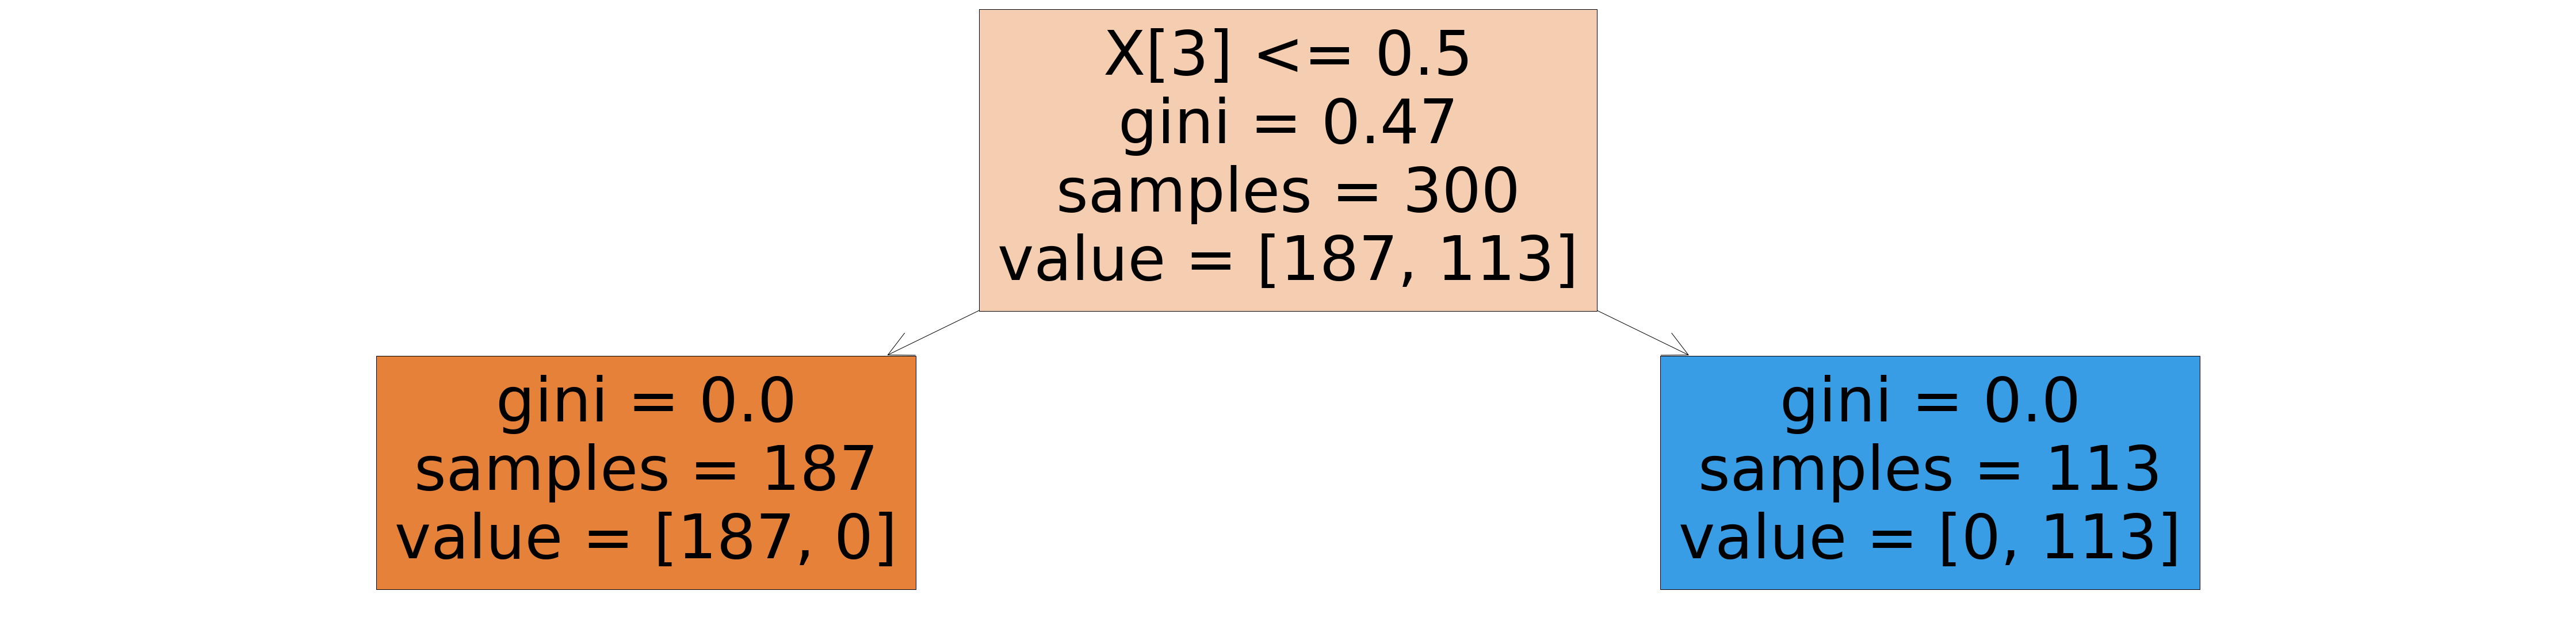

In [14]:
plt.figure(figsize = (80,20))
tree.plot_tree(obj, filled = True)

In [15]:
yhat = obj.predict(x_train)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_train,yhat)

1.0

In [18]:
obj = obj.fit(x_test,y_test)

[Text(2232.0, 815.4000000000001, 'X[3] <= 0.5\ngini = 0.42\nsamples = 100\nvalue = [70, 30]'),
 Text(1116.0, 271.79999999999995, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(3348.0, 271.79999999999995, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]')]

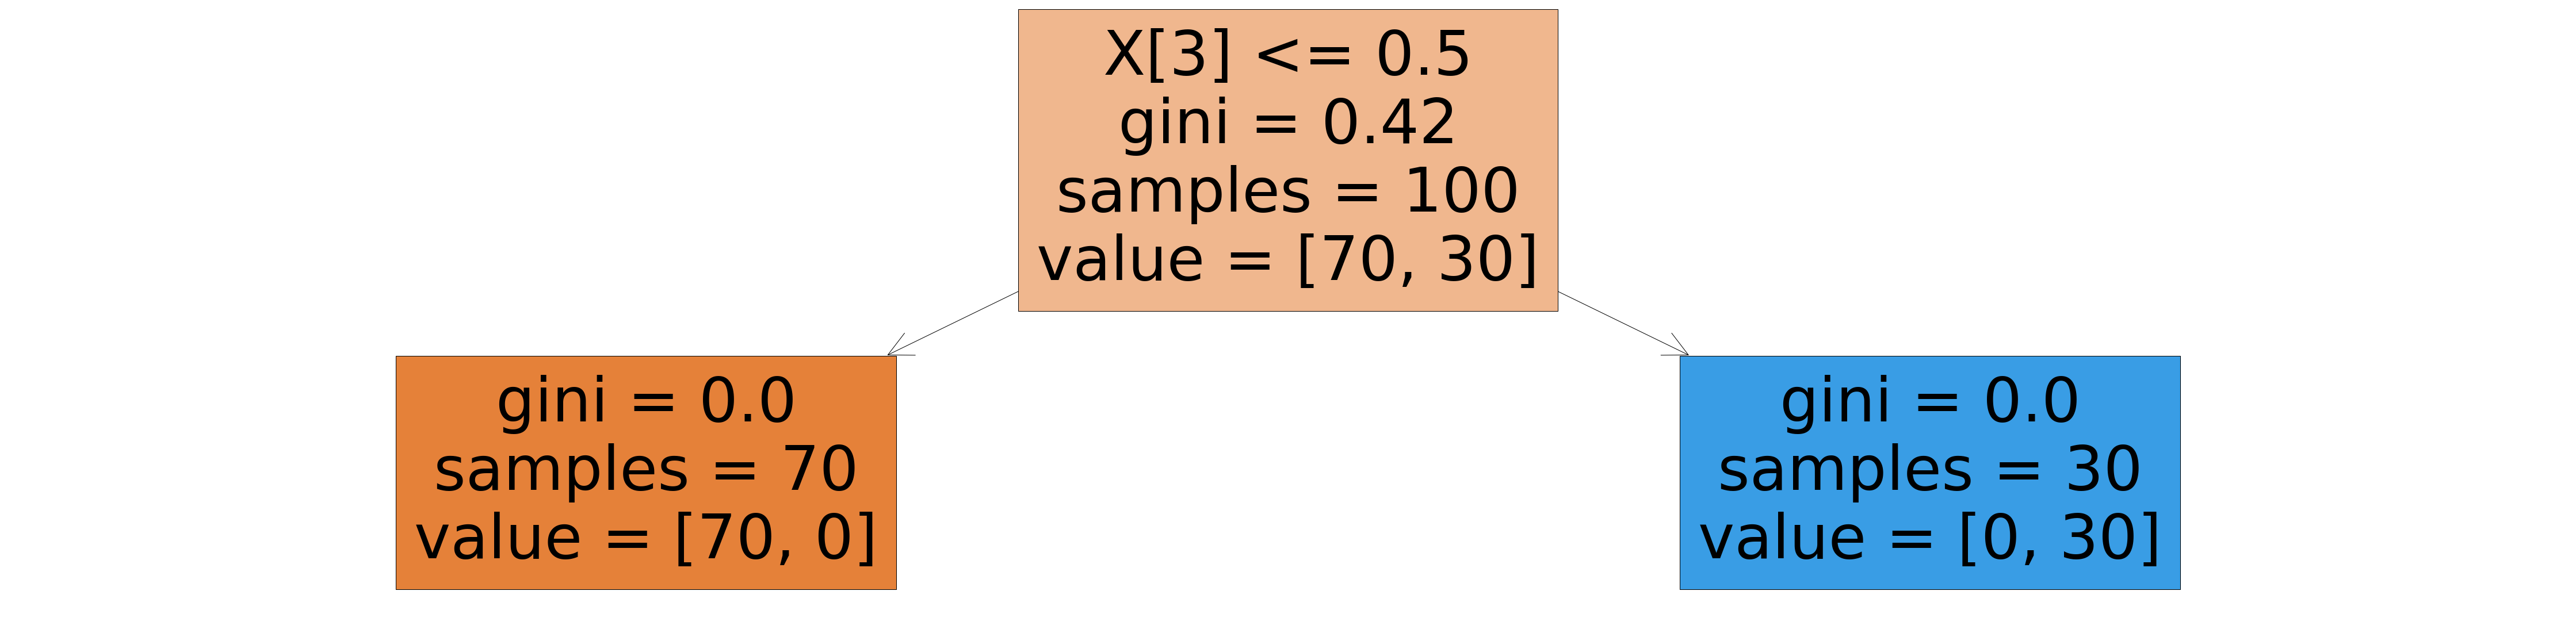

In [19]:
plt.figure(figsize = (80,20))
tree.plot_tree(obj, filled = True)

In [20]:
yhat = obj.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,yhat)

1.0

# KNN

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
get_ipython().run_line_magic('matplotlib', 'inline')


In [25]:
df = pd.read_csv('Social_Network_Ads (2).csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df=pd.get_dummies(df)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [27]:
X = df[['Age','Gender_Female','Gender_Male','EstimatedSalary']].values
X[0:4]

array([[   19,     0,     1, 19000],
       [   35,     0,     1, 20000],
       [   26,     1,     0, 43000],
       [   27,     1,     0, 57000]], dtype=int64)

In [28]:
y = df['Purchased'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 4) (320,)
Test set: (80, 4) (80,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:

k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
yhat = neigh.predict(X_test)
yhat[0:5]
T=[[27,11000,0,1]]
p=neigh.predict(T)
print(p)

[0]


In [33]:

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))


Train set Accuracy:  0.890625


In [34]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.8


# Bagging

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [36]:
df = pd.read_csv('Social_Network_Ads (2).csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
df=pd.get_dummies(df)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [38]:
X = X = df[['Age','Gender_Female','Gender_Male','EstimatedSalary']]
Y = df['Purchased']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=3)

In [43]:
bag = BaggingClassifier(max_samples=.4)

In [44]:
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.4, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [45]:
bag.score(x_train, y_train)

0.9266666666666666

In [46]:
bag.fit(x_test, y_test)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.4, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [47]:
bag.score(x_test, y_test)

0.94

# AdaBoostClassifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
n = AdaBoostClassifier(base_estimator=None, n_estimators=5000)

In [50]:
n.fit(x_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5000, random_state=None)

In [51]:
n.score(x_test, y_test)

0.98

In [52]:
n.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5000, random_state=None)

In [53]:
n.score(x_train, y_train)

0.9866666666666667